<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/cnn_%EB%B8%8C%EB%9E%9C%EB%93%9C%EC%84%A0%ED%83%9D_jpnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 Hongjai Rhee.

# CNN을 사용하여 conditional logit 브랜드 선택 모형을 구현해보자.

### 텐서플로 라이블러리 불러오기

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

### MNIST 데이터셋 불러오기
x는 28*28 이미지 벡터이고, y는 0~9의 클래스
---
비유적으로 x가 28개 브랜드의 28개 특성, y는 선택된 10개의 브랜드 코드라 하자. 

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape)


# CNN 필터의 원리

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

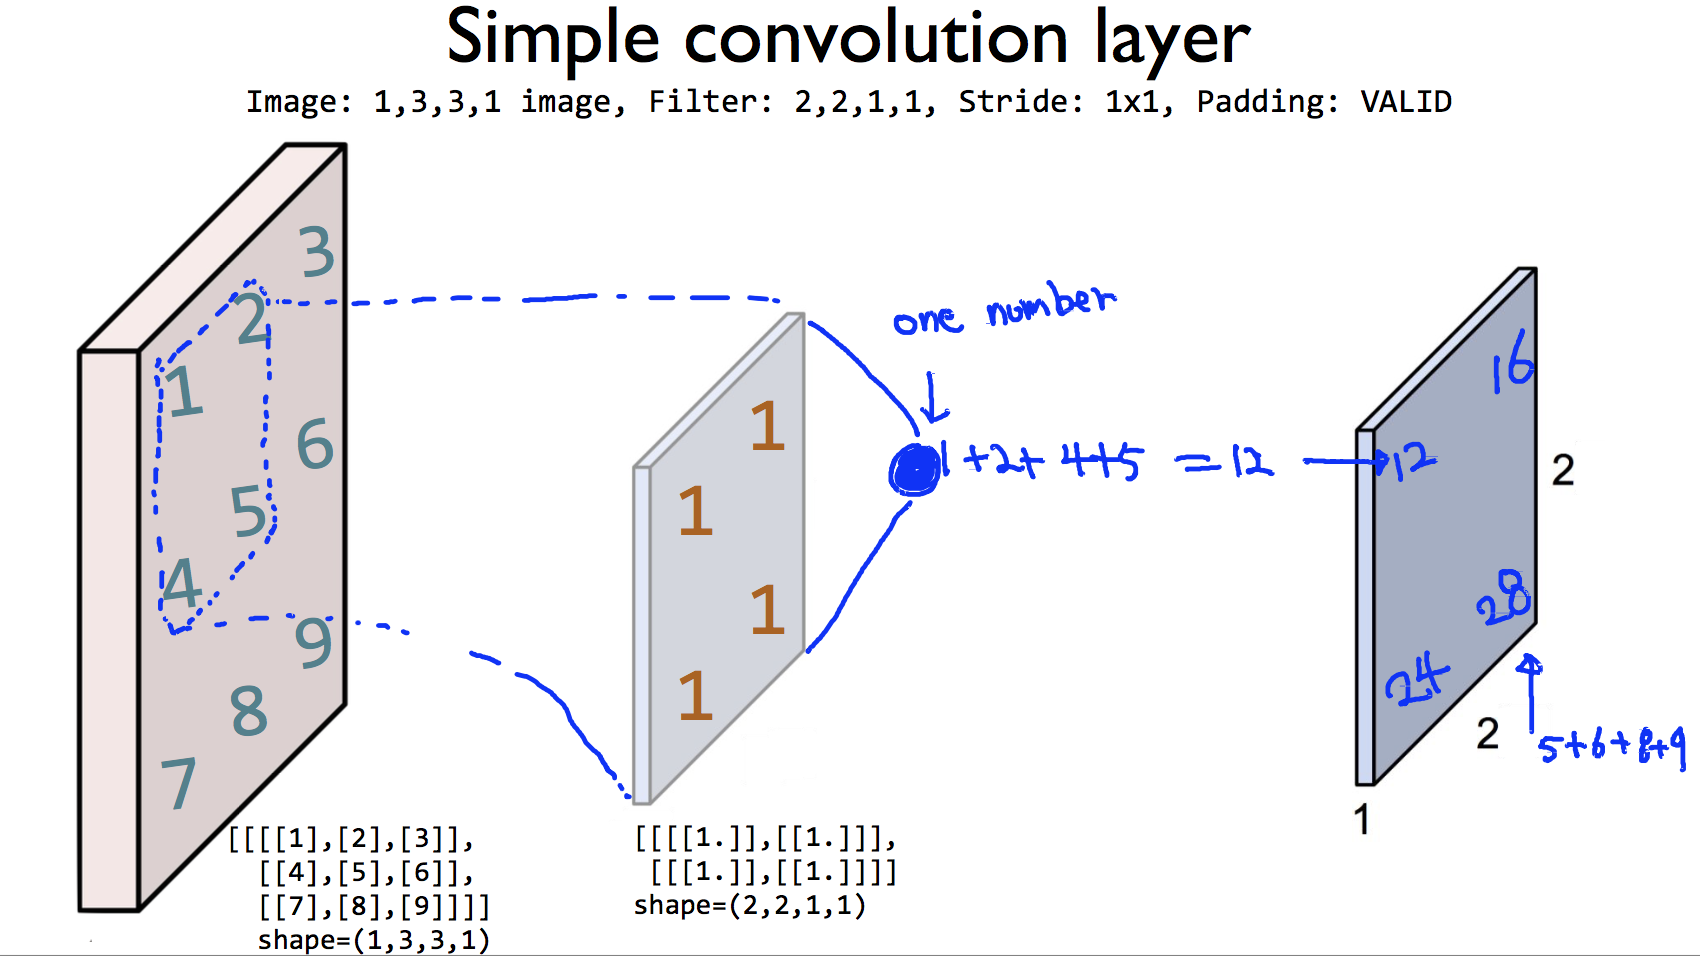

In [0]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

### CNN 모형설정

(1,28) 필터를 사용하면, 아래로 한칸씩 이동하며 각 브랜드에서 하나씩 숫자를 뽑아냅니다.  
---
각 브랜드의 value 라고 해석할 수 있겠습니다. 10개의 필터를 사용하고, max_pooling은 하지 않겠습니다. 


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(10, (1, 28), activation='relu', input_shape=(28, 28, 1)))


지금까지 모델의 구조를 출력해 보죠.

In [0]:
model.summary()

### Dense 층 추가하기


In [0]:
model.add(layers.Flatten())   ## 1차원으로 만들기
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

최종 모델의 구조를 확인해 보죠.

In [0]:
model.summary()

### 모델 컴파일과 훈련하기

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

### 모델 평가

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

결과에서 보듯이 간단한 CNN 모델이 매우 높은 테스트 정확도를 달성합니다. 